# Short introduction to numpy

**Why numpy?** Numpy stands for *numerical python* and is highly optimized (and then fast) for computations in python. Numpy is one of the core package on which many others are based on, such as scipy (for *scientific python*), matplotlib or pandas (described at the end of this chapter). A lot of other scientific tools are also based on numpy and that justifies to have - at least - a basic understanding of how it works. Very well, but one could also ask why using python?

**Why python?** Depending on your preferences and your purposes, python can be a very good option or not (of course this is largely a matter of taste and not everyone agrees with this statement). In any case, many tools are available in python, scanning a very broad spectrum of applications, from machine learning to web design or string processing.

## The core object: arrays

The core of numpy is the called numpy array. These objects allow to efficiently perform computations over large dataset in a very consise way from the language point of view, and very fast from the processing time point of view. The price to pay is to give up explicit *for* loops. This lead to somehow a counter intuitive logic - at first.

### Main differences with usual python lists

The first point is to differenciate numpy array from python list, since they don't behave in the same way. Let's define two python lists and the two equivalent numpy arrays.

In [1]:
import numpy as np
l1, l2 = [1, 2, 3], [3, 4, 5]
a1, a2 = np.array([1, 2, 3]), np.array([3, 4, 5])
print(l1, l2)

[1, 2, 3] [3, 4, 5]


First of all, all mathematical operations act element by element in a numpy array. For python list, the addition acts as a concatenation of the lists, and a multiplication by a scalar acts as a replication of the lists:

In [2]:
# obj1+obj2
print('python lists: {}'.format(l1+l2))
print('numpy arrays: {}'.format(a1+a2))

python lists: [1, 2, 3, 3, 4, 5]
numpy arrays: [4 6 8]


In [3]:
# obj*3
print('python list: {}'.format(l1*3))
print('numpy array: {}'.format(a1*3))

python list: [1, 2, 3, 1, 2, 3, 1, 2, 3]
numpy array: [3 6 9]


One other important difference is about the way to access element of an array, the so called slicing and indexing. Here the behaviour of python list and numpy arrays are closer expect that numpy array supports few more features, such as indexing by an array of integer (which doesn't work for python lists). Use cases of such indexing will be heavily illustrated in the next chapters.

In [4]:
# Indexing with an integer: obj[1]
print('python list: {}'.format(l1[1]))
print('numpy array: {}'.format(a1[1]))

python list: 2
numpy array: 2


In [5]:
# Indexing with a slicing: obj[slice(1,3))]
print('python list: {}'.format(l1[slice(1,3)]))
print('numpy array: {}'.format(l1[slice(1,3)]))

python list: [2, 3]
numpy array: [2, 3]


In [6]:
# Indexing with a list of integers: obj[[0,2]]
print('python list: IMPOSSIBLE')
print('numpy array: {}'.format(a1[[0,2]]))

python list: IMPOSSIBLE
numpy array: [1 3]


### Main caracteristics of an array

The strenght of numpy array is to be multidimensional. This enables a description of a whole complex dataset into a single numpy array, on which one can do operations. In numpy, dimension are also called *axis*. For example, a set of 2 position in space $\vec{r}_i$ can be seen as 2D numpy array, with the first axis being the point $i=1$ or $i=2$, and the second axis being the coordinates ($x,y,z$). There are few attributes which describe multidimentional arrays:

  + `a.dtype`: type of data contained in the array
  + `a.shape`: number of elements along each dimension (or axis)
  + `a.size`: total number of elements (product of `a.shape` elements)
  + `a.ndim`: number of dimensions (or axis)

In [7]:
points = np.array([[ 0,  1, 2],
                   [ 3,  4, 5]])

print('a.dtype = {}'.format(points.dtype))
print('a.shape = {}'.format(points.shape))
print('a.size  = {}'.format(points.size))
print('a.ndim  = {}'.format(points.ndim))

a.dtype = int64
a.shape = (2, 3)
a.size  = 6
a.ndim  = 2


## The three key features of numpy

### Vectorization

The *vectorization* is a way to make computations on numpy array **without explicit loops**, which are very slow in python. The idea of vectorization is to compute a given operation *element-wise* while the operation is called on the array itself. An example is given below to compute the inverse of 100000 numbers, both with explicit loop and vectorization.

In [8]:
a = np.random.randint(low=1, high=100, size=100000)

def explicit_loop_for_inverse(array):
    res = []
    for a in array:
        res.append(1./a)
    return np.array(res)

In [9]:
# Using explicit loop
%timeit explicit_loop_for_inverse(a)

322 ms ± 5.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
# Using list comprehension
%timeit [1./x for x in a]

287 ms ± 3.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
# Using vectorization
%timeit 1./a

361 µs ± 3.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**The suppression of explicit *for* loops is probably the most unfamiliar aspect of numpy - according to me - and deserves a bit a of practice. At the end, lines of codes becomes relatively short but ones need to properly think how to implement a given computation in a *pythonic way*.**

Many standard functions are implemented in a vectorized way, they are call the *universal functions*, or `ufunc`. Few examples are given below but the full description can be found in [numpy documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html).

In [12]:
a = np.random.randint(low=1, high=100, size=3)
print('a        : {}'.format(a))
print('a^2      : {}'.format(a**2))
print('a/(1-a^a): {}'.format(a/(1-a**a)))
print('cos(a)   : {}'.format(np.cos(a)))
print('exp(a)   : {}'.format(np.exp(a)))

a        : [35 45 63]
a^2      : [1225 2025 3969]
a/(1-a^a): [-4.16308599e-18 -1.72744810e-17  1.34732478e-17]
cos(a)   : [-0.90369221  0.52532199  0.98589658]
exp(a)   : [1.58601345e+15 3.49342711e+19 2.29378316e+27]


All these ufunct can work for n-dimension arrays and can be used in a very flexible way depeding on the axis you are refering too. Indeed the mathematical operation can be performed over a different axis of the array, having a totally different meaning. Let's give a simple concrete example with a 2D array of shape (5,2), *i.e.* 5 vectors of three coordinates $(x,y,z)$  Much more examples will be discussed in the section 2.

In [13]:
# Generate 5 vectors (x,y,z)
positions = np.random.randint(low=1, high=100, size=(5, 3))

# Average of the coordinate over the 5 observations
pos_mean = np.mean(positions, axis=0)
print('mean = {}'.format(pos_mean))

# Distance to the origin sqrt(x^2 + y^2 + z^2) for the 5 observations
distances = np.sqrt(np.sum(positions**2, axis=1))
print('distances = {}'.format(distances))

mean = [65.8 56.2 43.4]
distances = [ 58.76223277 125.24376232 125.56273332 119.40268004  86.1684397 ]


### Broadcasting

The *broadcasting* is a way to compute operation between arrays of having different sizes in a implicit (and consice) manner. One concrete example could be to translate three positions $\vec{r}_i=(x,y)_i$ by a vector $\vec{d}_0$ simply by adding `points+d0` where `points.shape=(3,2)` and `d0.shape=(2,)`. Few examples are given below but more details are give in [this documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html).

In [14]:
# operation between shape (3) and (1)
a = np.array([1, 2, 3])
b = np.array([5])
print('a+b = \n{}'.format(a+b))

a+b = 
[6 7 8]


In [15]:
# operation between shape (3) and (1,2)
a = np.array([1, 2, 3])
b = np.array([
              [4],
              [5],
             ])
print('a+b = \n{}'.format(a+b))

a+b = 
[[5 6 7]
 [6 7 8]]


In [16]:
# Translating 3 2D vectors by d0=(1,4)
points = np.random.normal(size=(3, 2))
d0 = np.array([1, 4])
print('points:\n {}\n'.format(points))
print('points+d0:\n {}'.format(points+d0))

points:
 [[ 0.99491158  0.77693002]
 [ 0.45197308 -0.99530903]
 [ 1.46077359  1.10085323]]

points+d0:
 [[1.99491158 4.77693002]
 [1.45197308 3.00469097]
 [2.46077359 5.10085323]]


Not all shapes can be combined together and there are *broadcasting rules*, which are (quoting the [numpy documentation](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html)):

> When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when
> 
>   1. they are equal, or
>   2. one of them is 1
  
In a failing case, one can then add a new *empty axis* `np.newaxis` to an array to make their dimension equal and then the broadcasting possible. Here is a very simle example:

In [17]:
a = np.arange(10).reshape(2,5)
b = np.array([10,20])

In [18]:
try:
    res = a+b
    print('Possible for {} and {}:'.format(a.shape, b.shape))
    print('a+b = \n {}'.format(res))
except ValueError:
    print('Impossible for {} and {}'.format(a.shape, b.shape))

Impossible for (2, 5) and (2,)


In [19]:
c = b[:, np.newaxis]
try: 
    res = a+c
    print('Possible for {} and {}:'.format(a.shape, c.shape))
    print('a+c = \n {}'.format(res))
except ValueError:
    print('Broadcasting for {} and {}'.format(a.shape, c.shape))

Possible for (2, 5) and (2, 1):
a+c = 
 [[10 11 12 13 14]
 [25 26 27 28 29]]


### Working with sub-arrays: slicing, indexing and mask (or selection)

As mentioned eariler, *slicing and indexing* are ways to access elements or sub-arrays in a smart way. Python allows slicing with `Slice()` object but `numpy` allows to push the logic much further with what is called *fancy indexing*. Few examples are given below and for more details, please have a look to [this documentation page](https://docs.scipy.org/doc/numpy-1.15.1/reference/arrays.indexing.html).

**Rule 1:** the syntax is `a[i]` to access the ith element. It is also possible to go from the last element using negative indices: `a[-1]` is the last element.

In [20]:
a = np.random.randint(low=1, high=100, size=10)
print('a = {}'.format(a))
print('a[2] = {}'.format(a[2]))
print('a[-1] = {}'.format(a[-1]))
print('a[[1, 2, 5]] = {}'.format(a[[1, 2, 5]]))

a = [53 36 46 81 76 35  2 63 18 42]
a[2] = 46
a[-1] = 42
a[[1, 2, 5]] = [36 46 35]


**Rule 2:** numpy also support array of indices. If the index array is multi-dimensional, the returned array will have the same dimension as the indices array.

In [21]:
# Small n-dimensional indices array: 3 arrays of 2 elements
indices = np.arange(6).reshape(3,2)
print('indices =\n {}'.format(indices))
print('a[indices] =\n {}'.format(a[indices]))

indices =
 [[0 1]
 [2 3]
 [4 5]]
a[indices] =
 [[53 36]
 [46 81]
 [76 35]]


In [22]:
# Playing with n-dimensional indices array: 2 arrays of (10, 10) arrays
indices_big = np.random.randint(low=0, high=10, size=(2, 3, 2))
print('indices_big =\n {}'.format(indices_big))
print('a[indices_big] =\n {}'.format(a[indices_big]))

indices_big =
 [[[0 6]
  [0 0]
  [0 2]]

 [[9 8]
  [2 2]
  [6 7]]]
a[indices_big] =
 [[[53  2]
  [53 53]
  [53 46]]

 [[42 18]
  [46 46]
  [ 2 63]]]


**Rule 3:** There is a smart way to access sub-arrays with the syntax `a[min:max:step]`. In that way, it's for example very easy to take one element over two (`step=2`), or reverse the order of an array (`step=-1`). This syntax works also for n-dimensional array, where each dimension is sperated by a comma. An example is given for a 1D array and for a 3D array of shape (5, 2, 3) - that can considered as 5 observations of 2 positions in space.

In [23]:
# 1D array
a = np.random.randint(low=1, high=100, size=10)
print('full array a              = {}'.format(a))
print('from 0 to 1: a[:2]        = {}'.format(a[:2]))
print('from 4 to end: a[4:]      = {}'.format(a[4:]))
print('reverse order: a[::-1]    = {}'.format(a[::-1]))
print('all even elements: a[::2] = {}'.format(a[::2]))

full array a              = [41 11 12 98 13 13 63 94 66 21]
from 0 to 1: a[:2]        = [41 11]
from 4 to end: a[4:]      = [13 13 63 94 66 21]
reverse order: a[::-1]    = [21 66 94 63 13 13 98 12 11 41]
all even elements: a[::2] = [41 12 13 63 66]


In [24]:
# 3D array
a = np.random.randint(low=0, high=100, size=(5, 2, 3))
print('a = \n{}'.format(a))

a = 
[[[23 63 62]
  [34 37 10]]

 [[99 51 49]
  [98 76 13]]

 [[22 76 27]
  [11 22 28]]

 [[23 40 72]
  [11 61 32]]

 [[42 73 66]
  [71  6 75]]]


Let's say, one wants to take only the $(x,y)$ coordinates for the first vector for all 5 observations. This is how each axis will be sliced:
  - first axis (=5 observations): `:`, *i.e.* takes all
  - second axis (=2 vectors): `1` *i.e.* only the 2nd element
  - third axis (=3 coordinates): `0:2` *i.e.* from $0$ to $2-1=1$, so only $(x,y)$

In [25]:
# Taking only the x,y values of the first vector for all observation:
print('a[:, 0, 0:2] =\n {}'.format(a[:, 0, 0:2]))

a[:, 0, 0:2] =
 [[23 63]
 [99 51]
 [22 76]
 [23 40]
 [42 73]]


In [26]:
# Reverse the order of the 2 vector for each observation:
print('a[:, ::-1, :] = \n{}'.format(a[:, ::-1, :]))

a[:, ::-1, :] = 
[[[34 37 10]
  [23 63 62]]

 [[98 76 13]
  [99 51 49]]

 [[11 22 28]
  [22 76 27]]

 [[11 61 32]
  [23 40 72]]

 [[71  6 75]
  [42 73 66]]]


**Rule 4:** The last part of of indexing is about *masking* array or in a more common language, *selecting* sub-arrays/elements. This allows to get only elements satisfying a given criteria, exploiting the indexing rules described above. Indeed, a boolean operation applied to an array such as `a>0` will directly return an array of boolean values `True` or `False` depending if the corresponding element satisfies the condition or not.

In [27]:
a = np.random.randint(low=-100, high=100, size=(5, 3))
mask = a>0
print('a = \n{}'.format(a))
print('\nmask = \n {}'.format(mask))

a = 
[[ 83  67  84]
 [  1 -67 -63]
 [-39  50 -94]
 [-61  36 -38]
 [  9 -24 -32]]

mask = 
 [[ True  True  True]
 [ True False False]
 [False  True False]
 [False  True False]
 [ True False False]]


In [28]:
print('\na[mask] = \n {}'.format(a[mask])) # always return 1D array
print('\na*mask = \n {}'.format(a*mask)) # preserves the dimension (False=0)
print('\na[~mask] = \n {}'.format(a[~mask])) # ~mask is the negation of mask
print('\na*~mask  = \n {}'.format(a*~mask)) # working for a product too.


a[mask] = 
 [83 67 84  1 50 36  9]

a*mask = 
 [[83 67 84]
 [ 1  0  0]
 [ 0 50  0]
 [ 0 36  0]
 [ 9  0  0]]

a[~mask] = 
 [-67 -63 -39 -94 -61 -38 -24 -32]

a*~mask  = 
 [[  0   0   0]
 [  0 -67 -63]
 [-39   0 -94]
 [-61   0 -38]
 [  0 -24 -32]]


**Note** the case of boolean arrays as indices has then a special treatment in numpy (since the result is always a 1D array). There is actually a dedicated numpy object called *masked array* (cf. [documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/maskedarray.html)) which allows to keep the whole array but without considering some elements in the computation (*e.g.* CCD camera with dead pixel). Note however that when a boolean array is used in an mathematical operation (such as `a*mask`) then `False` is treated as `0` and `True` as `1`:

In [29]:
print('a+mask = \n{}'.format(a+mask))

a+mask = 
[[ 84  68  85]
 [  2 -67 -63]
 [-39  51 -94]
 [-61  37 -38]
 [ 10 -24 -32]]


This boolean arrays are also very useful to *replace a category of elements* with a given value in a very easy, consise and readable way:

In [30]:
a = np.random.randint(low=-100, high=100, size=(5, 3))
print('Before: a=\n{}'.format(a))

a[a<0] = a[a<0]**2
print('\nAfter: a=\n{}'.format(a))

Before: a=
[[ 94 -80 -29]
 [ 44 -95  -6]
 [-29 -27 -82]
 [ 96 -53  -2]
 [ 30  41  -9]]

After: a=
[[  94 6400  841]
 [  44 9025   36]
 [ 841  729 6724]
 [  96 2809    4]
 [  30   41   81]]


## Few powerfull tools: matplotlib, pandas and scipy

### Plotting with matplotlib

matplolib is an extremely rich librairy for data visualization and there is no way to cover all its features in this note. The goal of this section is just to give short and practical examples to plot data. Much more details can be obtained on the [webpage](https://matplotlib.org/index.html). The following shows how to quickly make *histograms*, *graph*, *2D and 3D scatter plots*.


The main object of matplotlib is `matplotlib.pyplot` imported as `plt` here (and usually). The most common functions are then called on this objects, and often takes numpy arrays in argument (possibly with more than one dimension) and a lot of `kwargs` to define the plotting style.

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 

#### Example of 1D plots and histograms

To play with data, we generate 2 samples of 1000 values distributed according to a normal probability density function with $\mu=-1$ and $\mu=1$ respectively, and $\sigma=0.5$. These data are stored in a numpy array `x` of shape `x.shape=(1000, 2)`. We then simply compute and store the sinus of all these values into a same shape array `y`:

In [32]:
x = np.random.normal(loc=[-1, 1], scale=[0.5, 0.5], size=(1000,2))
y = np.sin(x)

The next step is to plot these data in two ways: first we want `y` v.s. `x`, second we want the histogram of the `x` values. We need to first create a figure, then create two *subplots* (specifying the number of line, column, and subplot index). Note that matplotlib take always the first dimension to define the numbers to plot, while higher dimensions are considered as other plots - automatically overlaid.

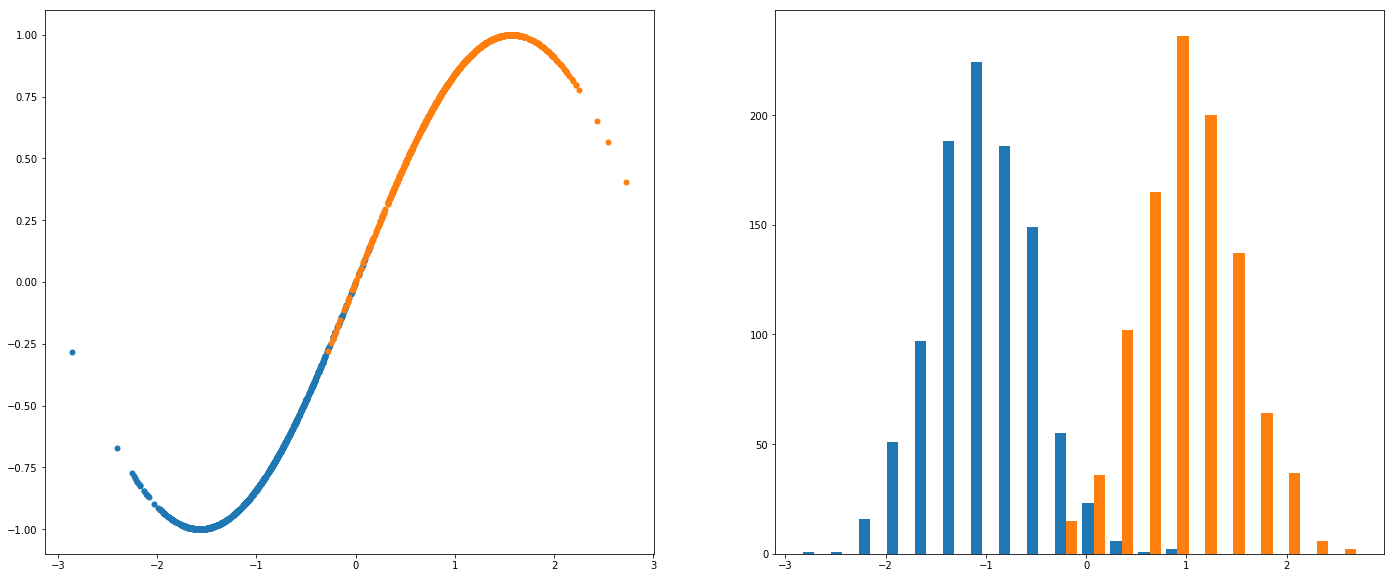

In [33]:
plt.figure(figsize=(24, 10))
plt.subplot(121) # 121 means 1 line, 2 column, 1st plot
plt.plot(x, y, marker='o', markersize=5, linewidth=0.0)
plt.subplot(122) # 122 means 1 line, 2 column, 2nd plot
plt.hist(x, bins=20);

#### Example of 2D scatter plot

A scatter plot allows to draw marker in a 2D space and a thrid information is encoded into the marker size. In order to play, we generated two set of 5000 numbers distributed according to uncorrelated gaussians of $(\mu_0=\mu_1=0)$ and $(\sigma_1,\sigma_2)=(0.5, 0.8)$ in a numpy array `points` of shape `points.shape=(5000,2)`. These two sets of numbers are then interepreted as $(x,y)$ positions being loaded in two `(5000, 1)` arrays `x` and `y`:

In [34]:
points = np.random.normal(loc=[0, 0], scale=[0.5, 0.8], size=(5000,2))
x, y = points[:, 0], points[:, 1]

We can then plot the 5000 points in the 2D plan, and here we specify the marker size at $100\times\sin^2(x)$ using the argument `s` of `the plt.scatter()` function (note that the array `x`, `y` and `s` must have the same shape):

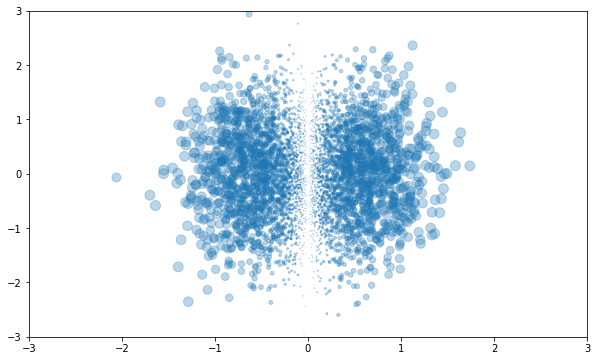

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, s=100*(np.sin(x))**2, marker='o', alpha=0.3)
plt.xlim(-3, 3)
plt.ylim(-3, 3);

#### Example of 3D plots

For 3D plots, one can generate 1000 positions in space, and operate a translation by a vector $\vec{r}_0$ using broadcasting:

In [36]:
data = np.random.normal(size=(1000, 3))
r0 = np.array([1, 4, 2])
data_trans = data + r0

It is then easy to get back the spatial initial (*i.e.* before translation) and final (*i.e.* after translation) coordinates:

In [37]:
xi, yi, zi = data[:,0], data[:,1], data[:,2]
xf, yf, zf = data_trans[:,0], data_trans[:,1], data_trans[:,2]

An additional module must be imported in order to plot data in three dimensions, and the projection has to be stated. Once it's done, a simple call to `ax.scatter3D(x,y,z)` does the plot. Note that we call a function of `ax` and not `plt` as before. This is due to the `ax = plt.axes(projection='3d')` command which is needed for 3D plotting. More details are available on the [matplotlib 3D tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html).

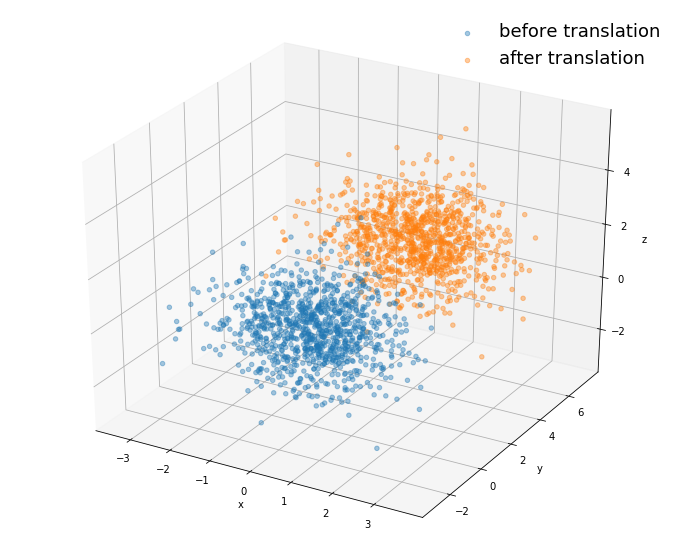

In [38]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(xi, yi, zi, alpha=0.4, label='before translation')
ax.scatter3D(xf, yf, zf, alpha=0.4, label='after translation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(frameon=False, fontsize=18);

### Import and manipulate data as numpy array via pandas

The package `pandas` is an very rich interface to read data from different format and produce a `pandas.dataframe` that can be based on `numpy` (but contanining a lot more features). There is no way to fully desribe this package here, the goal is simply to give functional and concrete example easily usable. More more details, please check the [pandas webpage](https://pandas.pydata.org/).


Many build-in functions are available to import data as pandas dataframe. One, which is particularly convenient, directly reads csv files (one can specify the columns to loads, the row to skip, and many other options ...):

In [39]:
import pandas as pd
cols_to_keep = ['HT', 'nlep', 'njet', 'pt_1st_bjet']
df = pd.read_csv('ttW.csv', usecols=cols_to_keep)
print(df.head())

            HT  njet  nlep  pt_1st_bjet
0   262.100311     2     2    48.112684
1   447.937225     4     4   118.460391
2  1287.348022     6     6    89.715039
3   453.677887     6     6    88.535555
4   268.445099     2     2   116.625023


On of the nice feature of pandas is to be able to easily get numpy array, compute and store the result as a new column. For instance, it's a common practice in machine learning to *normalize* the input variables, *i.e.* transform them to have a mean of 0 and a variance of 1.0. The following example shows how to add new $H_T$ distributions (the meaning of this variable doesn't matter for now) as new columns:

In [40]:
# Get a numpy arrays
ht = df['HT'].values

# Compute quantities
ht_mean = np.mean(ht)
ht_rms = np.sqrt(np.mean((ht-ht_mean)**2))

# Add them into the pandas dataframe
df['HT_centered'] = ht-ht_mean
df['HT_normalized'] = (ht-ht_mean)/ht_rms

# Print the result
cols_to_print = ['HT', 'HT_centered', 'HT_normalized']
print(df[cols_to_print].head())

            HT  HT_centered  HT_normalized
0   262.100311  -254.826585      -0.895919
1   447.937225   -68.989671      -0.242554
2  1287.348022   770.421127       2.708646
3   453.677887   -63.249009      -0.222371
4   268.445099  -248.481797      -0.873612


One can simply plot the content of a pandas dataframe using the name of the column. For instance, one can compare the evolution of $H_T$ after each transformation (which is trivial in this illustrative case):

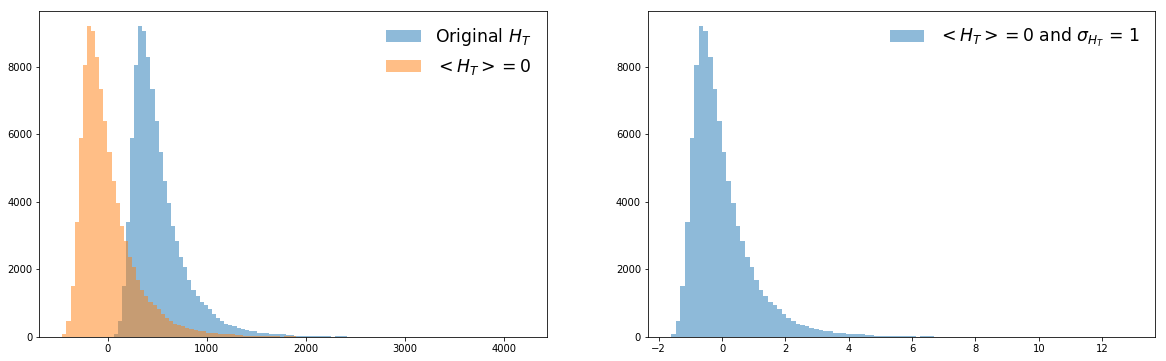

In [41]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(df['HT'], bins=100, alpha=0.5, label='Original $H_T$')
plt.hist(df['HT_centered'], bins=100, alpha=0.5, label='$<H_T> = 0$')
plt.legend(frameon=False, fontsize='xx-large')
plt.subplot(122)
plt.hist(df['HT_normalized'], bins=100, alpha=0.5, 
         label='$<H_T> = 0$ and $\sigma_{H_T}$ = 1')
plt.legend(frameon=False, fontsize='xx-large');

There are also many plotting function already included into the pandas library. To show only one example (all functions are decribed in the [pandas visualization tutorial](https://pandas.pydata.org/pandas-docs/stable/visualization.html)), here is the *scatter matrix* between variables (defined as a subset of the ones stored the dataframe) obtained in a single line of code:

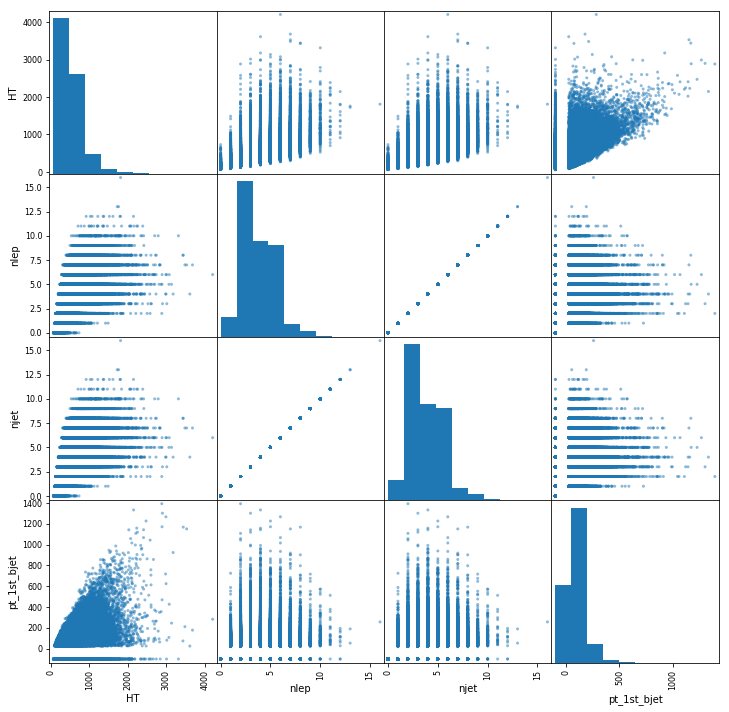

In [42]:
from pandas.plotting import scatter_matrix
var_to_plot = ['HT', 'nlep', 'njet', 'pt_1st_bjet']
scatter_matrix(df[var_to_plot], figsize=(12, 12), alpha=0.5);

###  Mathematics, physics and engineering with scipy

The [scipy](https://scipy.org/) project is python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, the following core package are part of it: NumPy, matplotlib, pandas, [scipy library](https://docs.scipy.org/doc/scipy-1.2.0/reference/) (very quickly introduced here) and [SymPy](https://www.sympy.org/en/index.html) (symbolic calculations with mathematical expressions *a la* mathematica). 

Obviously, there is no way to extensively present the scipy library in this short introduction, but one can quickly summarize few features and illustrate one with a concrete and useful example: fitting data points with a function. Among the main features, the SciPy library contains:

  + Integration (`scipy.integrate`): integrals, differential equations, etc ...
  + Optimization (`scipy.optimize`): minimization, fits, etc ...
  + Interpolation (`scipy.interpolate`): smoothing methods, etc ...
  + Fourier Transforms (`scipy.fftpack`): spectral analysis, etc ...
  + Signal Processing (`scipy.signal`): transfer functions, filtering, etc ...
  + Linear Algebra (`scipy.linalg`): matrix operation, diagonalisation, determinant, etc ...
  + Statistics (`scipy.stats`): random number, probability density function, cumulative distribution, etc ...

In [43]:
from scipy import optimize
from scipy import stats

Let's now show how to perform a fit of data with error bar using one particular function of `scipy.optimize`. First, we need to generate some data where we choose 20 measurements, with some noise of ~30% and an combined uncertainty of an absolute 0.1 uncertainty and 10% relative uncertainy: 

In [44]:
Npoints, Nsampling = 20, 1000
xcont = np.linspace(-5.0, 3.5, Nsampling)
x = np.linspace(-5, 3.0, Npoints)
y = 2*(np.sin(x/2)**2 + np.random.random(Npoints)*0.3)
dy = np.sqrt(0.10**2 + (0.10*y)**2)

Then we need to define functions with which we want to fit our data, for example a degree 1 polynoms. The syntax has to be `func(x, *pars)`:

In [45]:
def pol1(x, p0, p1):
    return p0 + x*p1

The following lines actually perform the fit and return both the optimal parameters and the covariances for the dgree 1 polynom:

In [46]:
p, cov = optimize.curve_fit(pol1, x, y, sigma=dy/y)

One can then generalize the procedure by plotting the result of the fit for polynoms of several degrees, after having plotted the data. This is a good way to compare different models for the same data. First, we define an arbitrary degree polynom `plo_func()` and we *vectorize* it using `np.vectorize` so that it can accept NumPy arrays:

In [47]:
def pol_func(x, *coeff):
    a = np.array([coeff[i]*x**i for i in range(len(coeff))])
    return np.sum(a)

pol_func = np.vectorize(pol_func)

In the previous call for `optimize.curve_fit()`, we didn't use additional arguement. For this example, we need to specify at least the starting point of the parameters `p0` *because the number of paramter will be assessed using `len(p0)` (it's not known a priori since it is dynamically allocated)*. Other options can be specified, such as the miminum and maximum allowed values of parameters. Here is a wrapp-up function performing the fit for an arbitrary polynom degree:

In [48]:
def fit_polynom(degree):
    nPars = degree+1
    p0, pmin, pmax = [1.0]*nPars, [-10]*nPars, [10]*nPars
    fit_options = {'p0': p0, 'bounds': (pmin, pmax), 'check_finite': True}
    par, cov = optimize.curve_fit(pol_func, x, y, sigma=dy, **fit_options)
    return par, cov

degree_max = 12

The following code try every polynomial functions up to a degree `degree_max=`, perform the fit and overlay the the result for each together with the experimental data on the same figure:

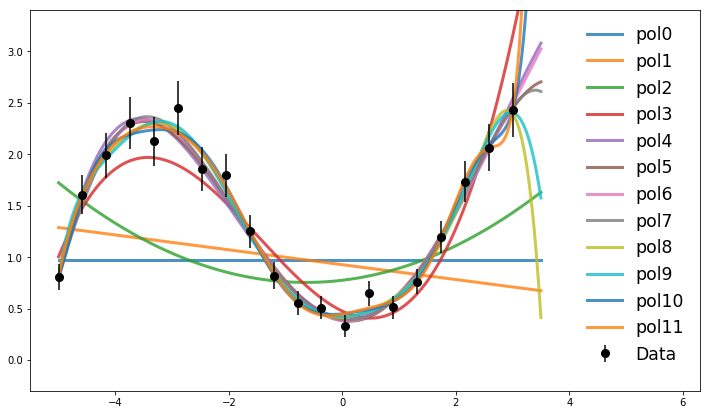

In [49]:
# Figure for the result
fig = plt.figure(figsize=(12,7))

# Fitting & plotting 
for d in np.arange(0, degree_max):
    par, cov = fit_polynom(d)
    plt.plot(xcont, pol_func(xcont, *par), label='pol{}'.format(d), 
             linewidth=3, alpha=0.8)

# Plotting data
style = {'marker': 'o', 'color': 'black', 'markersize': 8,
         'linestyle': '', 'zorder': 10, 'label': 'Data'}
plt.errorbar(x, y, yerr=dy, **style)

# Plot cosmetics
plt.xlim(-5.5, 6.3)
plt.ylim(-0.3, 3.4)
plt.legend(frameon=False, fontsize='xx-large');

It is possible to quantify how well a given model explain the observations, computing what we call the *goodness of fit*. In a frequentist approach, this can be assessed by the fraction of pseudo-data coming from - in principle - repeating the exact same experiment, with to a worst agreement for a given model. The agreement can be quantified using $\chi^2 = \sum^{n}_{i=1} \frac{(y_i - f(x_i))^2}{{\sigma_i}^2}$ and its probability density function (PDF) directly gives access to the fraction of "worst pseudo-data" (by integrating the PDF from $\chi^2$ to $\infty$). More precisely, one can use the cumulative distribution function (CDF) of $\chi^2$ computed with $n$ degrees of freedom, for instance `Npoins`, *i.e.* `len(x)`. More details can be found, for examble, in the [statistics review of the Particle Data Group](http://pdg.lbl.gov/2018/reviews/rpp2018-rev-statistics.pdf). The following two functions allow to compute the goodness of fit:

In [50]:
def get_chi2_nDOF(y, dy, yfit):
    r = (y-yfit)/dy
    return  np.sum(r**2), len(y)

def get_pvalue(chi2, nDOF):
    return 1-stats.chi2.cdf(chi2, df=nDOF)

We can now perform all these fits and extract the goodness of fit ($\chi^2$ and $p$-value) for each model:

In [51]:
# Fitting and getting p-value
degree, chiSquare, pvalue = [], [], []
for d in np.arange(degree_max):
    par, cov = fit_polynom(d)
    c2, n = get_chi2_nDOF(y, dy, pol_func(x, *par))
    degree.append(d), chiSquare.append(c2), pvalue.append(get_pvalue(c2, n))

The following piece of code plot both the $\chi^2$ and the $p$-value versus the degree of the polynom using two different $y$-axis. This gives another way to use matplolib by defining explicit object such as `ax` and `fig` and call methods on those (called *stateless appraoch*), instead of using function on `plt` (called *stateful approach*). For more details on these different approaches, see this [RealPython post](https://realpython.com/python-matplotlib-guide/#the-matplotlib-object-hierarchy).

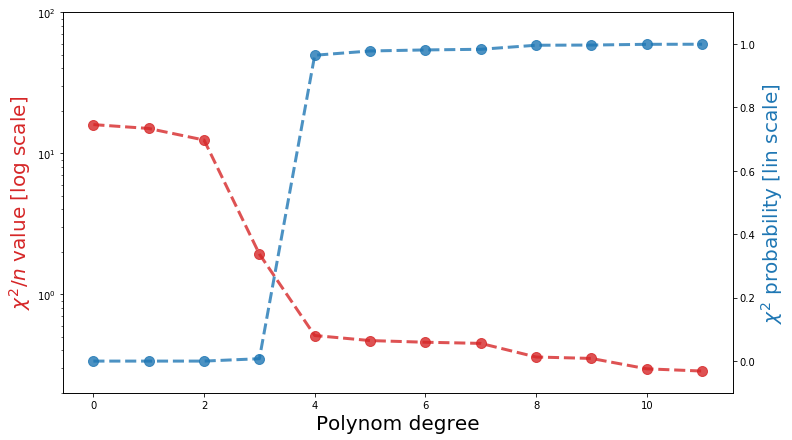

In [52]:
# Plotting the result with 2 different axis
fig, ax1 = plt.subplots(figsize=(12,7))
ax1.set_xlabel('Polynom degree', fontsize=20)
style = {'marker': 'o', 'markersize': 10, 'alpha': 0.8, 
         'linestyle': '--', 'linewidth': 3}

# Plot chi2/n
ax1.semilogy(degree, np.array(chiSquare)/Npoints, color='tab:red', **style)
ax1.set_ylim(0.2, 100)
ax1.set_ylabel('$\chi^2/n$ value [log scale]', color='tab:red', fontsize=20)

# Plot p-values
ax2 = ax1.twinx()
ax2.plot(degree, pvalue, color='tab:blue', **style)
ax2.set_ylim(-0.1, 1.1)
ax2.set_ylabel('$\chi^2$ probability [lin scale]', color='tab:blue', fontsize=20);

This is also possible to know whether two models give a similar description or if one model is better than the other. This is called the *F-test*, based on the residual sum of square $RSS \equiv \sum (y_i-f(x_i))^2$ (RSS). For a fit of $n$ data points with a model M1 defined by $p_1$ parameters with $RSS_1$ and a model M2 defined by $p_2$ parameters with $RSS_2$ *with $p_2>p_1$*, the F-test is defined by:

$$
F(M1, M2) = \frac{ \left(\frac{RSS_1 - RSS_2 }{p_2-p_1}\right)} {\left(\frac{RSS_2}{n-p_2}\right)}
$$

If the $p$-value of $F$ is close to 1.0, it means that the two model are equally compatible with data and there is no indication that a choice should be made. In that case, one would favour the simplest model with less paramters. If the $p$-value of $F$ is close to 0, then the two compared model are actually different and one has to select one.

Let's first define the RSS function and compute it over all the polynoms:

In [53]:
def get_RSS(y, yfit):
    return np.sum((y-yfit)**2)

RSS = []
for d in np.arange(degree_max):
    par, cov = fit_polynom(d)
    RSS.append(get_RSS(y=y, yfit=pol_func(x, *par)))

Then, one can define a function to actually compare two degrees where $d_2$ must be larger than $d_1$:

In [54]:
def compare_pol_pq(d1, d2):
    
    # Sanity checks
    if d1 not in degree or d2 not in degree:
        raise NameError('Degree no supported')
    if d2<d1:
        d2, d1 = d1, d2
    
    # Extract M1 and M2 numbers
    RSS1, p1 = RSS[d1], d1+1
    RSS2, p2 = RSS[d2], d2+1
    
    # F-value & p-value
    Fval = (RSS1-RSS2)/(p2-p1) * (Npoints-p2)/RSS2
    pval = 1-stats.f.cdf(x=Fval, dfn=p2-p1, dfd=Npoints-p2)
    
    return Fval, pval

Plot the F-test values and its $p$-values for the comparison between $d-1$ and $d$ starting from $d=3$. This plot shows that from $d=6$, there is a faire compatibility between the models (at worst $15\%$):

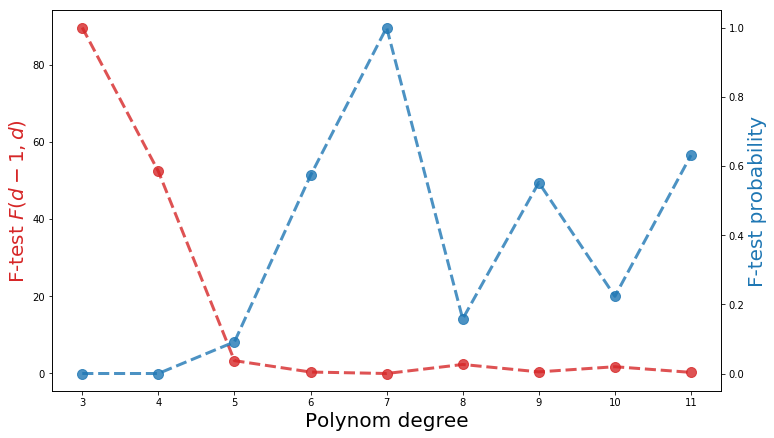

In [55]:
# Computing F-test comparisons starting from degree=4
dmin, compare = 3, compare_pol_pq
dinf, dsup = np.arange(dmin-1, degree_max), np.arange(dmin, degree_max)
result = np.array([compare(d1, d2) for d1, d2 in zip(dinf, dsup)])
Ftest, pval = result[:, 0], result[:, 1]

# Plotting figure and syle the results
fig, ax1 = plt.subplots(figsize=(12,7))
ax1.set_xlabel('Polynom degree', fontsize=20)
style = {'marker': 'o', 'markersize': 10, 'alpha': 0.8, 
         'linestyle': '--', 'linewidth': 3}

# Plot of F-test values
ax1.plot(dsup, Ftest, color='tab:red', **style)
ax1.set_ylabel('F-test $F(d-1,d)$', color='tab:red', fontsize=20)

# Plot of p-values
ax2 = ax1.twinx()
ax2.plot(dsup, pval, color='tab:blue', **style)
ax2.set_ylabel('F-test probability', color='tab:blue', fontsize=20);

In order to effectively check by eye that the F-test give a sensible information, one can plot the cumulative sum of fit residus $(y-f(x))^2$ and the F-test probability side-by-side: 

(1, 1.8)

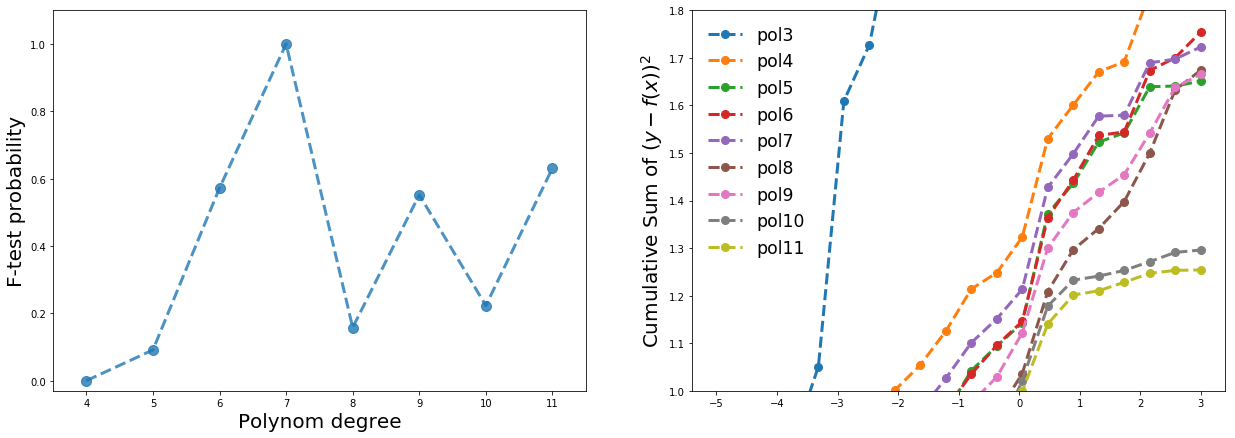

In [67]:
# Plotting figure and syle the results
plt.figure(figsize=(21,7))
style = {'marker': 'o', 'markersize': 10, 'alpha': 0.8, 
         'linestyle': '--', 'linewidth': 3}

# Plot of F-test values
plt.subplot('121')
plt.plot(dsup[1:], pval[1:], **style)
plt.ylabel('F-test probability' , fontsize=20);
plt.xlabel('Polynom degree', fontsize=20)
plt.xlim(3.5, 11.5)
plt.ylim(-0.03, 1.1)

# Putting the cumsum of fit residus aside
plt.subplot('122')
style = {'marker': 'o', 'markersize': 8,
         'linestyle': '--', 'linewidth': 3}
for d in np.arange(3, degree_max):
    par, cov = fit_polynom(d)
    plt.plot(x, np.cumsum(np.abs(y-pol_func(x, *par))), label='pol{}'.format(d), **style)
plt.legend(frameon=False, fontsize='xx-large');
plt.ylabel('Cumulative Sum of $(y-f(x))^2$', fontsize=20);
plt.ylim(1, 1.8);

We can then see on these 2 plots that indeed, comparing low degrees polynoms (like $d=4$ and $d=3$) leads to q large difference (and thus a low F-test probability), while comparing high degrees polynoms (*e.g.* $d=6$ and $d=5$) leads to very similar prediction meaning a sizable F-test probability.

**something has to be understood, related to CDF of f distribution**